In [1]:
#se importan las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
#se importa el set de datos
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv', sep=",")
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [3]:
#vemos el nombre de todas las columnas que tenemos
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [4]:
print(df.iloc[1])

DR_NO                                           200106753
Date Rptd                          02/09/2020 12:00:00 AM
DATE OCC                           02/08/2020 12:00:00 AM
TIME OCC                                             1800
AREA                                                    1
AREA NAME                                         Central
Rpt Dist No                                           182
Part 1-2                                                1
Crm Cd                                                330
Crm Cd Desc                         BURGLARY FROM VEHICLE
Mocodes                                    1822 1402 0344
Vict Age                                               47
Vict Sex                                                M
Vict Descent                                            O
Premis Cd                                           128.0
Premis Desc             BUS STOP/LAYOVER (ALSO QUERY 124)
Weapon Used Cd                                        NaN
Weapon Desc   

In [5]:
df.shape

(955339, 28)

Consigna i: elegir un método de feature selection para reducir la dimensionalidad del dataset.

Eliminación de columnas irrelevantes: Columnas como DR_NO, LOCATION, Cross Street, Crm Cd, Premis Cd, Weapon Used Cd, Status, y Rpt Dist No no son interpretativas o están redundadas por otras más descriptivas (como Crm Cd Desc, Premis Desc y Weapon Desc).

In [6]:
# Eliminar columnas irrelevantes
columnas_para_drop = ['DR_NO', 'LOCATION', 'Cross Street', 'Crm Cd', 'Premis Cd', 
                   'Weapon Used Cd', 'Status', 'Rpt Dist No']
df = df.drop(columns=columnas_para_drop)

Las columnas Date Rptd, DATE OCC y TIME OCC se pueden transformar para capturar patrones temporales más claros:

Mes y día de la semana.
Periodo del día (mañana, tarde, noche).

In [7]:
# Convierto fechas a formato datetime
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

# Crear nuevas columnas
df['Month'] = df['DATE OCC'].dt.month
df['DayOfWeek'] = df['DATE OCC'].dt.day_name()
df['Hour'] = df['TIME OCC'] // 100  # Convierto TIME OCC a horas

# Elimino columnas originales de fecha y hora si ya no son necesarias
df = df.drop(columns=['Date Rptd', 'DATE OCC', 'TIME OCC'])

C:\Users\Leo\AppData\Local\Temp\ipykernel_8048\717966798.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')
C:\Users\Leo\AppData\Local\Temp\ipykernel_8048\717966798.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')


In [8]:
# Identificar valores faltantes
print(df.isnull().sum())

AREA                 0
AREA NAME            0
Part 1-2             0
Crm Cd Desc          0
Mocodes         136675
Vict Age             0
Vict Sex        130045
Vict Descent    130055
Premis Desc        569
Weapon Desc     630320
Status Desc          0
Crm Cd 1            11
Crm Cd 2        886873
Crm Cd 3        953045
Crm Cd 4        955275
LAT                  0
LON                  0
Month                0
DayOfWeek            0
Hour                 0
dtype: int64


In [9]:
# Rellenar valores faltantes, Vict Sex y Vict Descent: Relleno con la moda.
df['Vict Sex'] = df['Vict Sex'].fillna(df['Vict Sex'].mode()[0])
df['Vict Descent'] = df['Vict Descent'].fillna(df['Vict Descent'].mode()[0])

# Eliminar columnas con demasiados valores faltantes
df = df.drop(columns=['Weapon Desc','Crm Cd 2','Crm Cd 3','Crm Cd 4'])

Analizamos la correlación entre columnas numéricas para eliminar redundancias.

In [10]:
from sklearn.decomposition import PCA

# Seleccionar columnas numéricas
columnas_numéricas = df.select_dtypes(include=['float64', 'int64']).columns

df_num = df[columnas_numéricas]

df_num.head()

,AREA,Part 1-2,Vict Age,Crm Cd 1,LAT,LON,Hour
0,7,1,0,510.0,34.0375,-118.3506,21
1,1,1,47,330.0,34.0444,-118.2628,18
2,3,1,19,480.0,34.0210,-118.3002,17
3,9,1,19,343.0,34.1576,-118.4387,20
4,6,2,28,354.0,34.0944,-118.3277,12


In [ ]:
#relleno valores nan 
valor_más_frecuente = df_num['Crm Cd 1'].mode()[0]
df_num['Crm Cd 1'].fillna(valor_más_frecuente, inplace=True)

C:\Users\Leo\AppData\Local\Temp\ipykernel_8048\2319809241.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_num['Crm Cd 1'].fillna(valor_más_frecuente, inplace=True)
C:\Users\Leo\AppData\Local\Temp\ipykernel_8048\2319809241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Crm Cd 1'].fillna(valor_más_frecuente, inplace=True)


In [12]:
print(df_num.isnull().sum())

AREA        0
Part 1-2    0
Vict Age    0
Crm Cd 1    0
LAT         0
LON         0
Hour        0
dtype: int64


In [13]:
modelo_pca = PCA(n_components=7)

modelo_pca.fit(df_num)

PCA(n_components=7)

In [14]:
modelo_pca.components_

array([[-6.79486522e-05,  1.66806895e-03, -1.55265966e-03,
         9.99996648e-01, -3.17800429e-04,  1.10458936e-03,
         4.29620404e-04],
       [ 6.08546430e-03,  4.76212233e-03,  9.99898673e-01,
         1.54949594e-03, -4.00835355e-05,  5.04409300e-04,
        -1.18438586e-02],
       [ 1.03135974e-02, -4.29062954e-03,  1.18093986e-02,
        -3.79770112e-04,  5.77416595e-03, -1.96235775e-02,
         9.99658536e-01],
       [ 9.65346094e-01,  5.74068363e-04, -5.92993839e-03,
         3.61310221e-04,  7.55709187e-02, -2.49256475e-01,
        -1.52164203e-02],
       [ 2.60670391e-01,  9.29499466e-05, -1.86156270e-03,
        -1.10216016e-03, -2.66228900e-01,  9.27834343e-01,
         1.70840272e-02],
       [-5.64283696e-04,  9.99977840e-01, -4.70493298e-03,
        -1.67721388e-03,  3.26993723e-04,  6.06158026e-05,
         4.35206719e-03],
       [-3.76017243e-03, -3.33145091e-04, -7.75666892e-05,
        -1.33897765e-07,  9.60925418e-01,  2.76781646e-01,
        -7.8856217

In [15]:
modelo_pca.explained_variance_ratio_[0]

np.float64(0.9862457194411932)

In [16]:
lista_componentes = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
componentes = pd.DataFrame(data=modelo_pca.components_, columns = df_num.columns, index=lista_componentes)
componentes

,AREA,Part 1-2,Vict Age,Crm Cd 1,LAT,LON,Hour
PC1,-0.000068,0.001668,-0.001553,9.999966e-01,-0.000318,0.001105,0.000430
PC2,0.006085,0.004762,0.999899,1.549496e-03,-0.000040,0.000504,-0.011844
PC3,0.010314,-0.004291,0.011809,-3.797701e-04,0.005774,-0.019624,0.999659
PC4,0.965346,0.000574,-0.005930,3.613102e-04,0.075571,-0.249256,-0.015216
PC5,0.260670,0.000093,-0.001862,-1.102160e-03,-0.266229,0.927834,0.017084
PC6,-0.000564,0.999978,-0.004705,-1.677214e-03,0.000327,0.000061,0.004352
PC7,-0.003760,-0.000333,-0.000078,-1.338978e-07,0.960925,0.276782,-0.000079


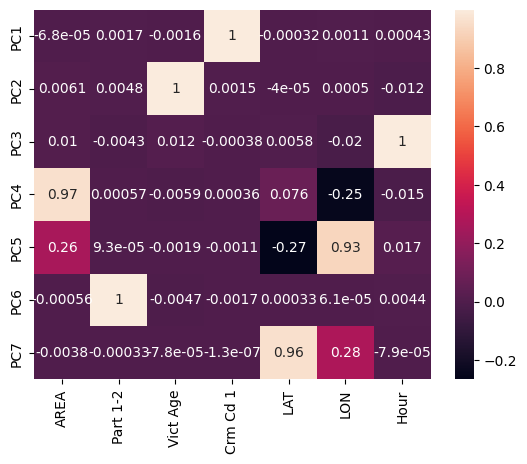

In [17]:
matriz = sns.heatmap(componentes, annot=True)

Voy a usar un algoritmo como Random Forest para calcular la importancia de las características.

Realizo una reduccion de muestra para poder ejecutar el codigo, sino me tiraba error por ser muy pesado. 

Uso df.muestra(n=sample_size, random_state=42) para tomar una muestra aleatoria de 100,000 filas.
Esto asegura que el procesamiento sea más rápido al reducir la cantidad de datos.

Selección de Variables Numéricas:
Elimino cualquier columna no numérica para evitar problemas con el escalado y el PCA.

PCA con 10 Componentes:
Limito el número de componentes principales a 10 o menos, dependiendo de la dimensionalidad del dataset reducido.

Entrenamiento con Random Forest:
Uso los datos transformados con PCA para entrenar un modelo de Random Forest, y luego obtenemos la importancia de las características (componentes principales numericos).

Visualización:
Se genera un gráfico de barras para visualizar la importancia de los componentes principales.


Importancia de las características (Componentes principales):
Componente principal 1: Importancia = 0.1424
Componente principal 2: Importancia = 0.1588
Componente principal 3: Importancia = 0.1208
Componente principal 4: Importancia = 0.1060
Componente principal 5: Importancia = 0.1078
Componente principal 6: Importancia = 0.1150
Componente principal 7: Importancia = 0.1342
Componente principal 8: Importancia = 0.1148


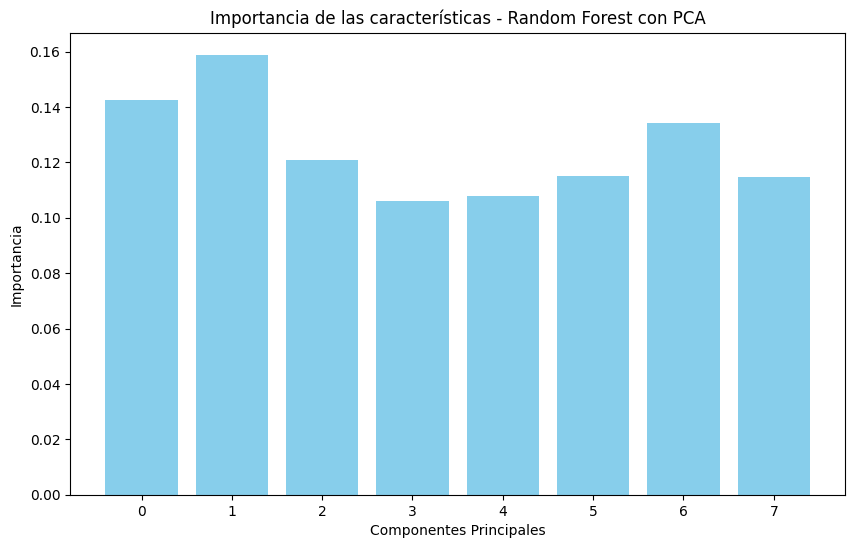

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

tamaño_muestra = 100000  # Cambiar el tamaño de la muestra según tus necesidades
df_muestra = df.sample(n=tamaño_muestra, random_state=42)

# Separar variables independientes (X) y dependiente (y)
X = df_muestra.drop(columns=['Status Desc'])  # Reemplaza con tu columna objetivo
y = df_muestra['Status Desc']

# Seleccionar solo columnas numéricas
X_numerico = X.select_dtypes(include=['number'])

# Manejar valores nulos
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_numerico)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Ajustar n_components dinámicamente para PCA
n_components = min(X_scaled.shape[0], X_scaled.shape[1])  # Elige el menor entre filas y columnas
if n_components > 10:  # Reducir más si es posible
    n_components = 10

# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=n_components, random_state=42)
X_reduced = pca.fit_transform(X_scaled)


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Entrenar el modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Obtener la importancia de las características
importances = model.feature_importances_

# Mostrar las importancias
print("Importancia de las características (Componentes principales):")
for i, importance in enumerate(importances):
    print(f"Componente principal {i+1}: Importancia = {importance:.4f}")

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, color='skyblue')
plt.xlabel('Componentes Principales')
plt.ylabel('Importancia')
plt.title('Importancia de las características - Random Forest con PCA')
plt.show()

In [19]:
X_numerico

,AREA,Part 1-2,Vict Age,Crm Cd 1,LAT,LON,Month,Hour
846904,5,1,63,310.0,33.7904,-118.2777,8,18
476171,13,1,36,230.0,33.9916,-118.2564,5,1
660583,10,2,26,740.0,34.1660,-118.5095,12,8
22804,2,1,33,236.0,34.0451,-118.2779,6,23
930568,12,2,53,930.0,34.0038,-118.2842,2,16
...,...,...,...,...,...,...,...,...
507074,10,2,36,354.0,34.2084,-118.5535,10,6
502097,2,1,0,510.0,34.0646,-118.2630,2,23
815296,7,1,30,220.0,34.0838,-118.3637,7,11
587293,2,1,26,230.0,34.0559,-118.2756,1,7


Conclusión General sobre la Importancia:

Aunque las variables numéricas tienen un papel clave en la predicción de "Status Desc" (Descripción del estado del caso ej., "Investigación en curso".), la reducción de dimensionalidad a través de PCA nos indica que las combinaciones de esas variables (y no las variables individuales) están influyendo de manera más significativa en la predicción.
Al observar las importancias de los componentes, vemos que las primeras componentes (especialmente la Componente 2 "Vict Age") explican gran parte de la variabilidad en los datos. Esto significa que las características combinadas de las variables numéricas están muy relacionadas con el "Status Desc" y que el modelo de Random Forest puede estar capturando estos patrones complejos.

Con PCA simplifique el conjunto de datos, los primeros componentes principales siguen siendo fundamentales para predecir el "Status Desc", lo que sugiere que las variables originales, como la ubicación geográfica, la edad de la víctima y las horas del día, son muy relevantes para la predicción de este estado.

Consigna ii: elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos.

In [20]:
from sklearn.metrics import classification_report, accuracy_score


# Separar variables independientes (X) y dependiente (y) de la muestra
X = df_muestra.drop(columns=['Status Desc'])  # Reemplaza con tu columna objetivo
y = df_muestra['Status Desc']  # Asegúrate de que también proviene de la misma muestra

# Seleccionar solo columnas numéricas para X
X_numerico = X.select_dtypes(include=['number'])

# Manejar valores nulos en las variables numéricas
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_numerico)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Aplicar PCA para reducción de dimensionalidad
n_components = min(X_scaled.shape[0], X_scaled.shape[1])  # Elige el menor entre filas y columnas
if n_components > 10:  # Reducir más si es posible
    n_components = 10

pca = PCA(n_components=n_components, random_state=42)
X_reduced = pca.fit_transform(X_scaled)

# Codificar la variable objetivo si es categórica
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_encoded, test_size=0.2, random_state=42)

# --- Entrenar el Modelo de Clasificación ---

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# --- Evaluación del Modelo ---

# Realizar predicciones en los datos de prueba
y_pred = rf_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, labels=range(len(label_encoder.classes_)), target_names=label_encoder.classes_))

Precisión del modelo: 0.79

Reporte de clasificación:
              precision    recall  f1-score   support

Adult Arrest       0.31      0.06      0.10      1717
 Adult Other       0.37      0.14      0.21      2216
 Invest Cont       0.82      0.96      0.89     15967
  Juv Arrest       0.00      0.00      0.00        56
   Juv Other       0.33      0.02      0.04        44
         UNK       0.00      0.00      0.00         0

    accuracy                           0.79     20000
   macro avg       0.31      0.20      0.21     20000
weighted avg       0.72      0.79      0.74     20000



c:\Users\Leo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Leo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Leo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

Precisión general: El modelo obtuvo una precisión global de 79%.

Consigna iii: cálculo de métricas básicas para validar el modelo.

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# --- Métricas Básicas ---
# Cálculo de Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Precisión global): {accuracy:.2f}")

# Cálculo de Precision, Recall y F1-Score (macro y weighted para evaluar balance y desbalance)
precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)

precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall_weighted = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("\nMétricas globales (promedio macro):")
print(f"Precisión (macro): {precision_macro:.2f}")
print(f"Sensibilidad (Recall) (macro): {recall_macro:.2f}")
print(f"F1-Score (macro): {f1_macro:.2f}")

print("\nMétricas ponderadas (weighted):")
print(f"Precisión (weighted): {precision_weighted:.2f}")
print(f"Sensibilidad (Recall) (weighted): {recall_weighted:.2f}")
print(f"F1-Score (weighted): {f1_weighted:.2f}")

# --- Matriz de Confusión ---
# Especificamos solo las etiquetas presentes en y_test
present_labels = list(label_encoder.classes_[np.unique(y_test)])  # Solo clases presentes
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

print("\nMatriz de Confusión:")
print(conf_matrix)




Accuracy (Precisión global): 0.79

Métricas globales (promedio macro):
Precisión (macro): 0.37
Sensibilidad (Recall) (macro): 0.24
F1-Score (macro): 0.25

Métricas ponderadas (weighted):
Precisión (weighted): 0.72
Sensibilidad (Recall) (weighted): 0.79
F1-Score (weighted): 0.74

Matriz de Confusión:
[[  102   144  1470     1     0]
 [   63   320  1833     0     0]
 [  161   398 15406     0     2]
 [    3     0    53     0     0]
 [    1     6    36     0     1]]


Conclusión del Trabajo de Clasificación: (trabajo realizado con 100.000 datos como muestra.)

El objetivo principal de este trabajo fue construir y evaluar un modelo de clasificación utilizando un enfoque de aprendizaje automático para predecir diferentes tipos de interacciones relacionadas con incidentes en el condado de Los Ángeles y en que estado queda cada caso. Para ello, se implementó un modelo basado en un bosque aleatorio (Random Forest), el cual fue entrenado y evaluado utilizando un conjunto de datos de incidentes registrados.

Los hallazgos clave del análisis muestran que el modelo logró una precisión global (accuracy) del 79%, destacando un excelente rendimiento para la categoría de "Investigaciones Continuadas" (Invest Cont) con un puntaje F1-Score de 0.82. Sin embargo, las categorías relacionadas con arrestos de adultos y juveniles muestran un rendimiento significativamente menor, con bajos puntajes de precisión, recall y F1-Score, lo que sugiere un desbalance en los datos o una representación insuficiente de estas clases en el conjunto de entrenamiento. La muestra la tome con 100.000 datos debido a que al ejecutarla con todo el dataset completo se me colgaba. Por eso use la reducción de dimensionalidad de PCA.  

------------------------------------------------------------------------------------

Información sobre la empresa (imaginaria) y motivo del objetivo:

Este trabajo simula el análisis para un departamento especializado en análisis de datos del Departamento de Policía de Los Ángeles (LAPD), que se encargada de procesar información de incidentes para mejorar la eficiencia operativa.
El modelo desarrollado serviría a la unidad de Inteligencia de Datos y Estrategias Preventivas, cuyo objetivo es desarrollar herramientas automatizadas para clasificar incidentes en tiempo real y anticipar tendencias delictivas, buscando la mejora de los Status Desc (estados en los que quedan los casos).


---------------------------------------------------------------------------------------

Hipótesis inicial:

Un modelo de aprendizaje automático, específicamente un Random Forest, será capaz de clasificar con precisión los incidentes reportados en el condado de Los Ángeles en diferentes categorías, basándose en atributos como el área, el tipo de crimen, edad de la victima, horario y ver en que estado esta el caso. Ya que buscamos esa variable objetivo y identificar que patrones afectan mas ese estado.

Resultados del modelo: El modelo Random Forest mostró un rendimiento razonable, con una precisión global del 79%. Sin embargo, la discrepancia en el desempeño entre las clases indica la necesidad de abordar el problema del desbalance en los datos, o ajustes en la ponderación de las clases durante el entrenamiento del modelo.
El bajo rendimiento en las categorías de arrestos juveniles y adultos puede deberse a la cantidad limitada de ejemplos en estas clases. Esto podría solucionarse mediante la recopilación de datos adicionales o ajustando el modelo para manejar el desbalance de manera más efectiva.